In [1]:
import pandas as pd
import numpy as np
import lifetime
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv(r"data/olist_customers_dataset.csv")
orders = pd.read_csv(r"data/olist_orders_dataset.csv")
payments = pd.read_csv(r"data/olist_order_payments_dataset.csv")
orders_items = pd.read_csv(r"data/olist_order_items_dataset.csv")

In [3]:
pd.set_option('display.max_rows', 40)



In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<h3 style="background-color: lightblue; padding: 10px;">
    Knowing the data
</h3>


In [8]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


<h6>
   <li>Lets check the number of unique values,</li> 
   <li> number of missing data,</li>
   <li>biggest category counts,</li> 
   <li>data type</li>
</h6>

In [9]:
def get_status(data):
    stat=[]
    for col in data.columns:
        stat.append([col,data[col].nunique(),data[col].isnull().sum()*100/customers.shape[0],data[col].value_counts(normalize=True,dropna=False).values[0]*100,data[col].dtype])
    return pd.DataFrame(stat,columns=["features","uniue","missing value pecentage","largest category_count percentage","data type"])

<h3 style="background-color: lightblue; padding: 10px;">
    Customer Data Status
</h3>


In [10]:
get_status(customers)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,customer_id,99441,0.0,0.001006,object
1,customer_unique_id,96096,0.0,0.017096,object
2,customer_zip_code_prefix,14994,0.0,0.142798,int64
3,customer_city,4119,0.0,15.627357,object
4,customer_state,27,0.0,41.980672,object


In [11]:
customers["customer_state"].value_counts(normalize=True,dropna=True).head()

customer_state
SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
Name: proportion, dtype: float64

<h3 style="background-color: lightblue; padding: 10px;">
    Payments Data Status
</h3>

In [12]:
get_status(payments)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,99440,0.0,0.027915,object
1,payment_sequential,29,0.0,95.643301,int64
2,payment_type,5,0.0,73.922376,object
3,payment_installments,24,0.0,50.580444,int64
4,payment_value,29077,0.0,0.311880,float64


In [13]:
payments["payment_type"].value_counts(normalize=True,dropna=True)

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64

In [14]:
payments["payment_installments"].value_counts(normalize=True,dropna=True).head()

payment_installments
1     0.505804
2     0.119487
3     0.100697
4     0.068325
10    0.051287
Name: proportion, dtype: float64

5 types of payments are there


here 73 percentage of them using credit card payment

having 50 per centage having 1st installment



<h3 style="background-color: lightblue; padding: 10px;">
    Orders Data Status
</h3>

In [15]:
get_status(orders)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,99441,0.000000,0.001006,object
1,customer_id,99441,0.000000,0.001006,object
2,order_status,8,0.000000,97.020344,object
3,order_purchase_timestamp,98875,0.000000,0.003017,object
4,order_approved_at,90733,0.160899,0.160899,object
5,order_delivered_carrier_date,81018,1.793023,1.793023,object
6,order_delivered_customer_date,95664,2.981668,2.981668,object
7,order_estimated_delivery_date,459,0.000000,0.524934,object


In [16]:
orders["order_status"].value_counts(normalize=True,dropna=True)

order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64

few values are missing,97 percentage order are delivered,few of the status are unavilable

<h3 style="background-color: lightblue; padding: 10px;">
    orders_items Data Status
</h3>

In [17]:
get_status(orders_items)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,order_id,98666,0.0,0.018642,object
1,order_item_id,21,0.0,87.586329,int64
2,product_id,32951,0.0,0.467821,object
3,seller_id,3095,0.0,1.804705,object
4,shipping_limit_date,93318,0.0,0.018642,object
5,price,5968,0.0,2.202397,float64
6,freight_value,6999,0.0,3.290723,float64


In [18]:
orders_items["order_item_id"].value_counts(normalize=True,dropna=True)

order_item_id
1     0.875863
2     0.087022
3     0.020302
4     0.008566
5     0.004083
6     0.002273
7     0.000515
8     0.000320
9     0.000249
10    0.000222
11    0.000151
12    0.000115
13    0.000071
14    0.000062
15    0.000044
16    0.000027
17    0.000027
18    0.000027
19    0.000027
20    0.000027
21    0.000009
Name: proportion, dtype: float64

lots order but fewer items

87% one category is dominated


<h3 style="background-color: lightblue; padding: 10px;">
    Data Preprocessing
</h3>

In [19]:
df1=payments.merge(orders,on="order_id")
df2=df1.merge(orders_items,on="order_id")
df=customers.merge(df2,on="customer_id")


In [20]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,...,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,...,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,...,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,...,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,...,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [21]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

<h5 style="background-color: #e8f0fe; padding: 8px;">
    Creating new columns/Feature Engineering
</h5>


In [22]:
df["order_date"]=pd.to_datetime(df['order_purchase_timestamp']).dt.date
df["order_estimated_delivery_date"]=pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date']=pd.to_datetime(df['order_delivered_carrier_date'])
df["'shipping_limit_date'"]=pd.to_datetime(df['shipping_limit_date'])

In [23]:
df["delivery_against_estimated"]=(df["order_estimated_delivery_date"]-df["order_delivered_customer_date"]).dt.days
df["order_purchase_year"]=df['order_purchase_timestamp'].apply(lambda x:x.year)
df["order_purchase_month"]=df['order_purchase_timestamp'].apply(lambda x:x.month)
df["dayofweek"]=df['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
df["day"]=df["dayofweek"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thurs",4:"Fri",5:"Sat",6:"Sun"})
df["order_purchase_hour"]=df['order_purchase_timestamp'].apply(lambda x:x.hour)
df["order_purchase_mon"]=df["order_purchase_mon"] = df["order_purchase_month"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})




In [24]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,freight_value,order_date,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,...,21.88,2017-05-16,2017-05-22 15:22:12,10.0,2017,5,1,Tue,15,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,...,46.48,2018-01-12,2018-01-18 20:58:32,7.0,2018,1,4,Fri,20,Jan
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,...,17.79,2018-05-19,2018-06-05 16:19:10,-2.0,2018,5,5,Sat,16,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,...,23.36,2018-03-13,2018-03-27 16:31:16,12.0,2018,3,1,Tue,16,Mar
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,...,22.25,2018-07-29,2018-07-31 10:10:09,5.0,2018,7,6,Sun,9,Jul


In [25]:
df['month_year']=df["order_purchase_month"].astype(str).apply(lambda x:'0' + x if len(x)==1 else x)

In [26]:
df['month_year'] =df["order_purchase_year"].astype(str) + '-' + df['month_year'].astype(str)

In [27]:
df['month_y'] = df['order_purchase_timestamp'].map(lambda date:100*date.year + date.month)

In [28]:
df['order_purchase_timestamp'].head()

0   2017-05-16 15:05:35
1   2018-01-12 20:48:24
2   2018-05-19 16:07:45
3   2018-03-13 16:06:38
4   2018-07-29 09:51:30
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [29]:
df['month_y'].head()

0    201705
1    201801
2    201805
3    201803
4    201807
Name: month_y, dtype: int64

<h5 style="background-color: #e8f0fe; padding: 8px;">
    Lets check the summary
</h5>

In [30]:
df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,...,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon,month_year,month_y
count,117601,117601,117601.000000,117601,117601,117601,117601.000000,117601,117601.000000,117601.000000,...,117601,115034.000000,117601.000000,117601.000000,117601.000000,117601,117601.000000,117601,117601,117601.000000
unique,98665,95419,NaN,4110,27,98665,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7,NaN,12,24,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mon,NaN,Aug,2017-11,NaN
freq,63,75,NaN,18590,49566,63,NaN,86769,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19130,NaN,12632,9016,NaN
mean,NaN,NaN,35051.793097,NaN,NaN,NaN,1.093528,NaN,2.939482,172.686752,...,2018-01-06 07:44:03.344223232,11.043326,2017.538193,6.028129,2.745750,NaN,14.760002,NaN,NaN,201759.847399
min,NaN,NaN,1003.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,2016-09-19 00:15:34,-189.000000,2016.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,201609.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,60.870000,...,2017-09-18 22:15:28,6.000000,2017.000000,3.000000,1.000000,NaN,11.000000,NaN,NaN,201709.000000
50%,NaN,NaN,24315.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,108.210000,...,2018-01-25 11:57:49,12.000000,2018.000000,6.000000,3.000000,NaN,15.000000,NaN,NaN,201801.000000
75%,NaN,NaN,58600.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,189.260000,...,2018-05-10 07:51:17,16.000000,2018.000000,8.000000,4.000000,NaN,19.000000,NaN,NaN,201805.000000
max,NaN,NaN,99990.000000,NaN,NaN,NaN,29.000000,NaN,24.000000,13664.080000,...,2020-04-09 22:35:08,146.000000,2018.000000,12.000000,6.000000,NaN,23.000000,NaN,NaN,201809.000000


some order_id are repeating

4 unique payment type exist

there are zero value payment

some freight value is so high equal to the order value 

In [31]:
get_status(df)

,features,uniue,missing value pecentage,largest category_count percentage,data type
0,customer_id,98665,0.000000,0.053571,object
1,customer_unique_id,95419,0.000000,0.063775,object
2,customer_zip_code_prefix,14976,0.000000,0.134353,int64
3,customer_city,4110,0.000000,15.807689,object
4,customer_state,27,0.000000,42.147601,object
5,order_id,98665,0.000000,0.053571,object
6,payment_sequential,29,0.000000,95.711771,int64
7,payment_type,4,0.000000,73.782536,object
8,payment_installments,24,0.000000,49.843964,int64
9,payment_value,28938,0.000000,0.297617,float64


<h5 style="background-color: #e8f0fe; padding: 8px;">
    Treating the Missing values
</h5>

<h4>
   <ul>Only few missing values are there so dropping is better approach,</ul>
   <li>order_delivered_carrier_date	1.251999% missing,	  </li>
   <li>order_delivered_customer_date	2.581430% missing,</li>
   <li>delivery_against_estimated	 	2.581430% missing,</li>	
   <li> order_approved_at           	0.015084% missing </li>
</h4>

In [32]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
order_date                          0
'shipping_limit_date'               0
delivery_against_estimated       2567
order_purchase_year                 0
order_purcha

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().any()

customer_id                      False
customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
order_id                         False
payment_sequential               False
payment_type                     False
payment_installments             False
payment_value                    False
order_status                     False
order_purchase_timestamp         False
order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
order_estimated_delivery_date    False
order_item_id                    False
product_id                       False
seller_id                        False
shipping_limit_date              False
price                            False
freight_value                    False
order_date                       False
'shipping_limit_date'            False
delivery_against_estimated       False
order_purchase_year      

In [35]:
df.to_csv(r"Final_data/final_data_csv")

<h3 style="background-color: lightblue; padding: 10px;">
    Exploratory Data Analysis
</h3>

In [36]:
def format_spines(ax, right_border=True):
    """Format the graphs"""
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
   

let check the number of order everyday

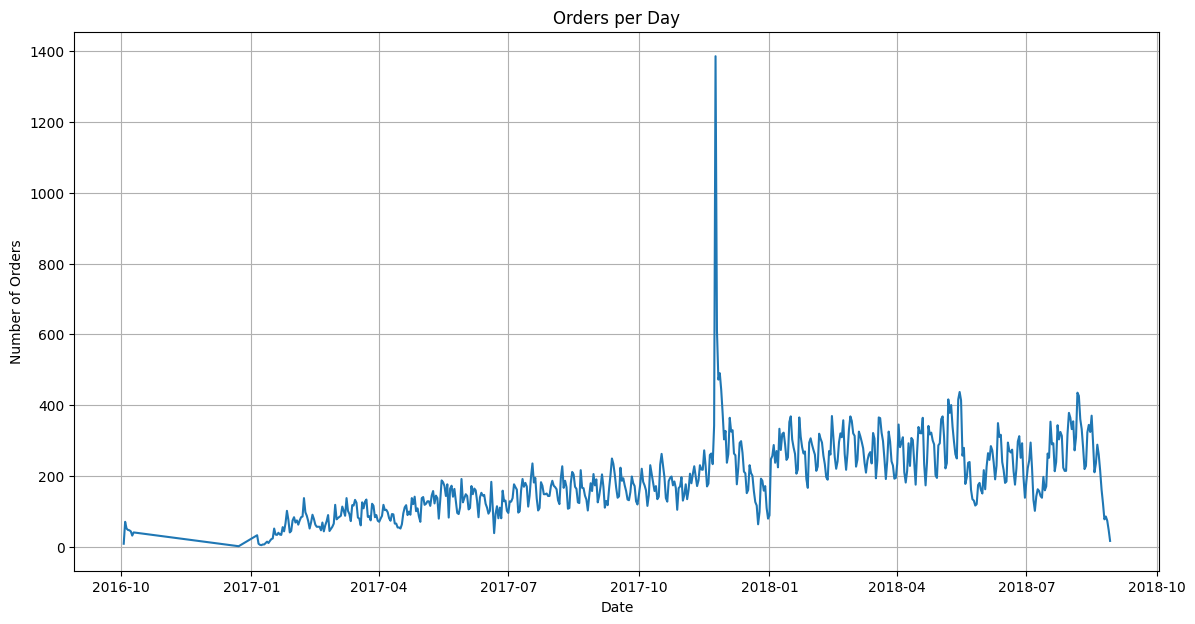

In [37]:
plt.figure(figsize = (14,7))

df["order_date"].value_counts().sort_index().plot()
plt.title("Orders per Day")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


<H5>INFERENCE<H5></H5>
Orders per day see to have peaks and flats regions.
The highest peak is observed somewhere near 2017-Aug.


Let's check the __revenue per day__

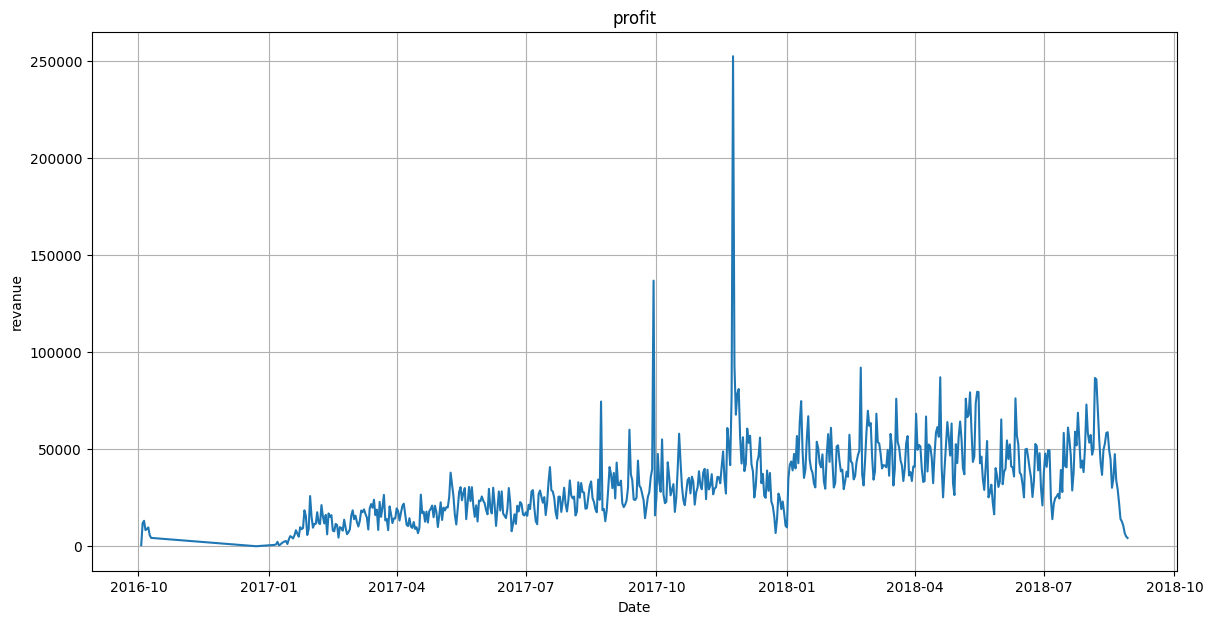

In [38]:
plt.figure(figsize = (14,7))

df.groupby("order_date")["payment_value"].agg("sum").sort_index().plot()
plt.title("profit")
plt.xlabel("Date")
plt.ylabel("revanue")
plt.grid()
plt.show()


__Observation__
- Similar observation as orders per day. But the highest peak happens at different time.

In [39]:
revanue=df.groupby("month_year")["payment_value"].agg("sum").reset_index()
revanue

,month_year,payment_value
0,2016-10,62591.65
1,2016-12,19.62
2,2017-01,176376.56
3,2017-02,323815.95
4,2017-03,505735.83
5,2017-04,456108.32
6,2017-05,701119.60
7,2017-06,585400.98
8,2017-07,716069.98
9,2017-08,842689.94


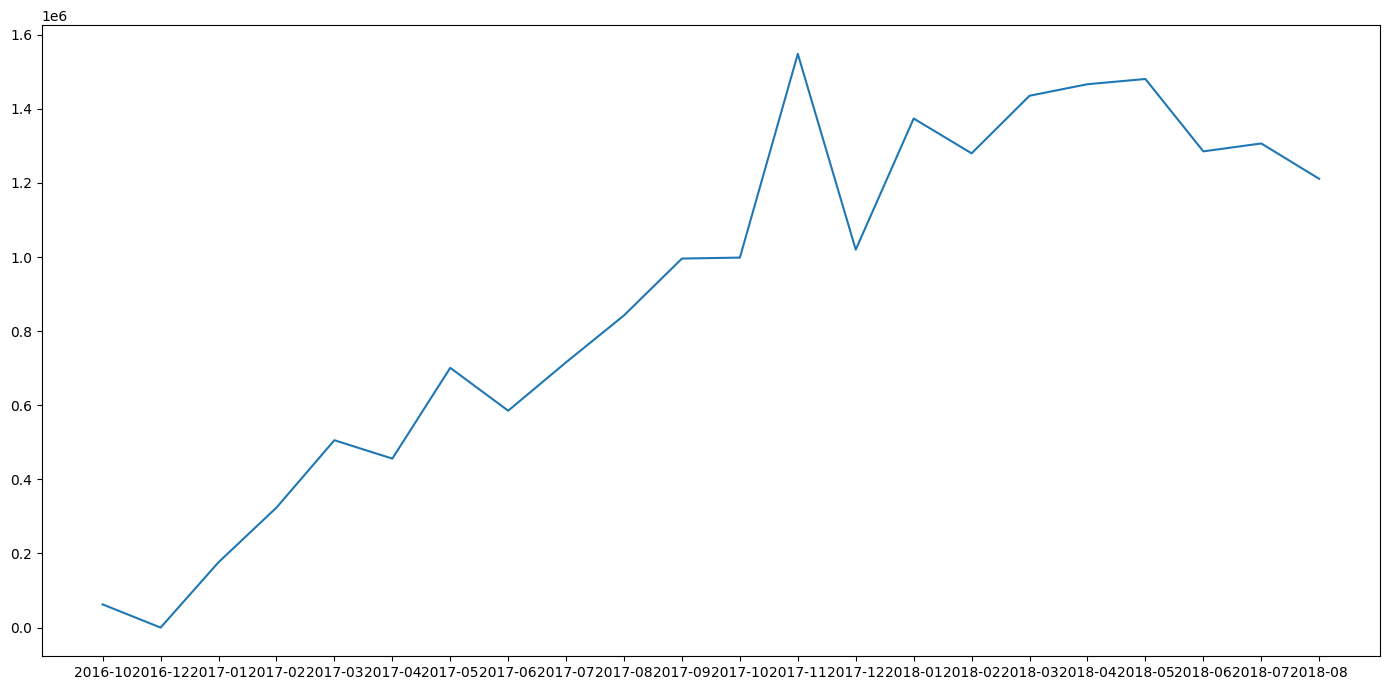

In [40]:
plt.figure(figsize = (14,7))
plt.plot(revanue["month_year"],revanue["payment_value"])
plt.tight_layout()

Inference: Revenue seem to have grown consistently over the years.

In [41]:
revanue['MonthlyGrowth'] = revanue['payment_value'].pct_change()
revanue['MonthlyGrowth'] 
revanue

,month_year,payment_value,MonthlyGrowth
0,2016-10,62591.65,NaN
1,2016-12,19.62,-0.999687
2,2017-01,176376.56,8988.630989
3,2017-02,323815.95,0.835935
4,2017-03,505735.83,0.561800
5,2017-04,456108.32,-0.098129
6,2017-05,701119.60,0.537178
7,2017-06,585400.98,-0.165048
8,2017-07,716069.98,0.223213
9,2017-08,842689.94,0.176826


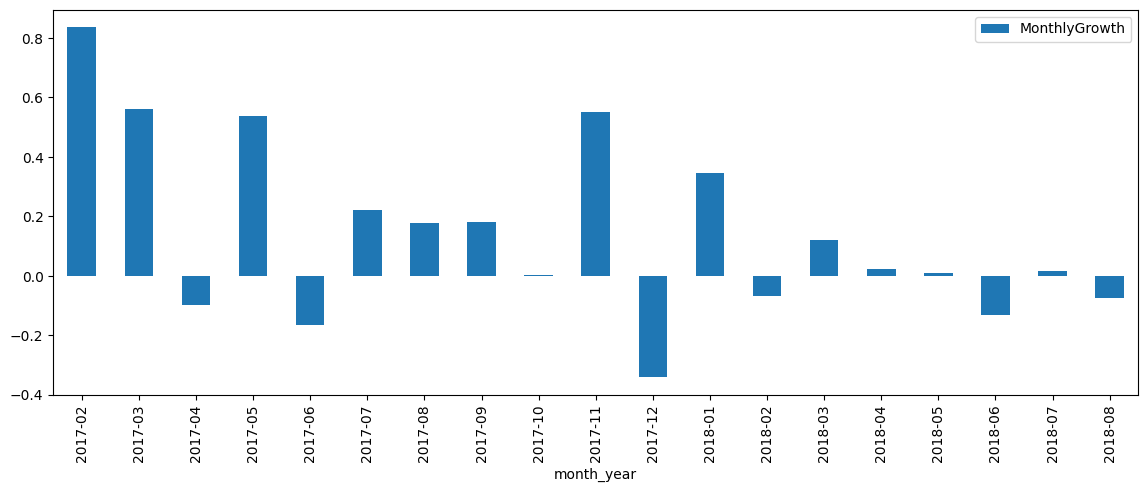

In [42]:
revanue.iloc[3:, :].plot.bar(x="month_year", y="MonthlyGrowth", figsize=(14,5));

Inference


Except for a few months showing temporary dips, the company’s monthly sales generally exhibit a consistent upward growth pattern. Specifically, months such as 2017-04, 2017-06, 2017-12, 2018-02, 2018-06, and 2018-08 show negative monthly growth, but outside these exceptions, the trend remains positive. Overall, the data indicates that the company is steadily increasing its sales over time, with most months contributing positively to year-over-year growth.

In [43]:
df_monthly_active=df.groupby("month_year")["customer_id"].nunique().reset_index()

In [44]:
df_monthly_active

,month_year,customer_id
0,2016-10,270
1,2016-12,1
2,2017-01,748
3,2017-02,1641
4,2017-03,2546
5,2017-04,2303
6,2017-05,3545
7,2017-06,3135
8,2017-07,3872
9,2017-08,4193


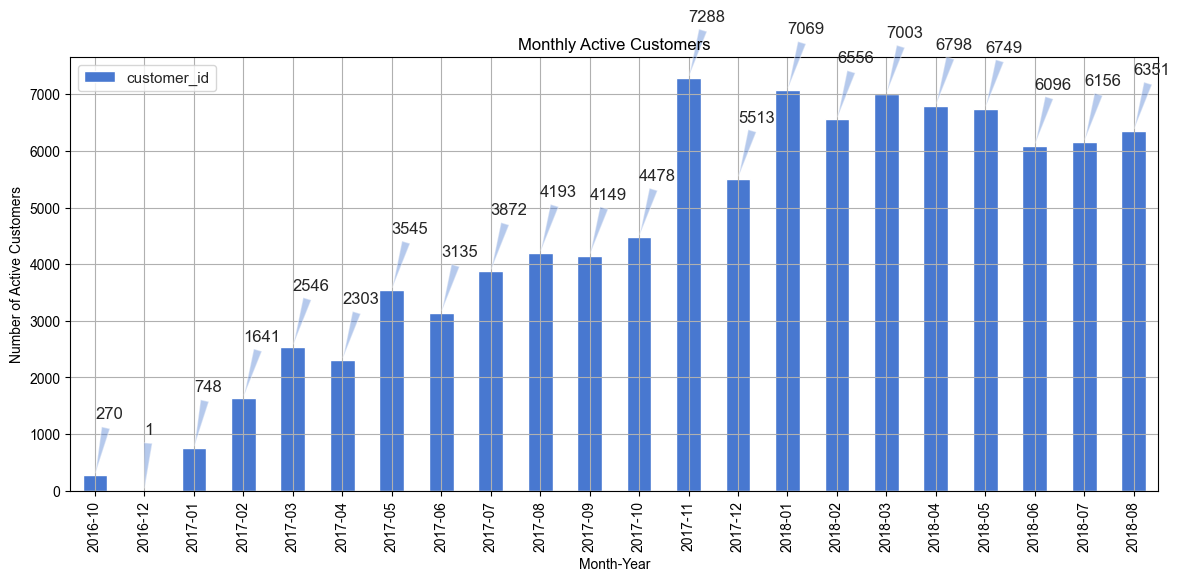

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
df_monthly_active.plot.bar(
    x="month_year",
    y="customer_id",
    ax=ax
)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Monthly Active Customers")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Number of Active Customers")
for idx,row in df_monthly_active.iterrows():
    ax.annotate(text=row["customer_id"],
            xy=(idx,row["customer_id"]),
            xytext=(idx,row["customer_id"]+1000),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5",alpha=0.4));
plt.tight_layout()
plt.show()

Observation:

This visualization helps reveal how many active customers the company is adding each year by showing month-wise growth patterns. By examining the bar heights across months, we can identify periods of strong customer acquisition, seasonal fluctuations, and any months where customer engagement slows down. This makes it easier to evaluate year-over-year growth and understand whether the business is consistently increasing its active customer base or experiencing irregular patterns.

It is evident that the company is able to both retain its existing customers and steadily increase the number of active customers year over year

#### Average Revenue per Customer Purchase

In [46]:
average_monthly_revPerCustomere=df.groupby("month_year")["payment_value"].mean().reset_index()

In [47]:
average_monthly_revPerCustomere

,month_year,payment_value
0,2016-10,186.284673
1,2016-12,19.620000
2,2017-01,183.534402
3,2017-02,166.144664
4,2017-03,164.306637
5,2017-04,168.492176
6,2017-05,164.582066
7,2017-06,158.774337
8,2017-07,151.517135
9,2017-08,166.770224


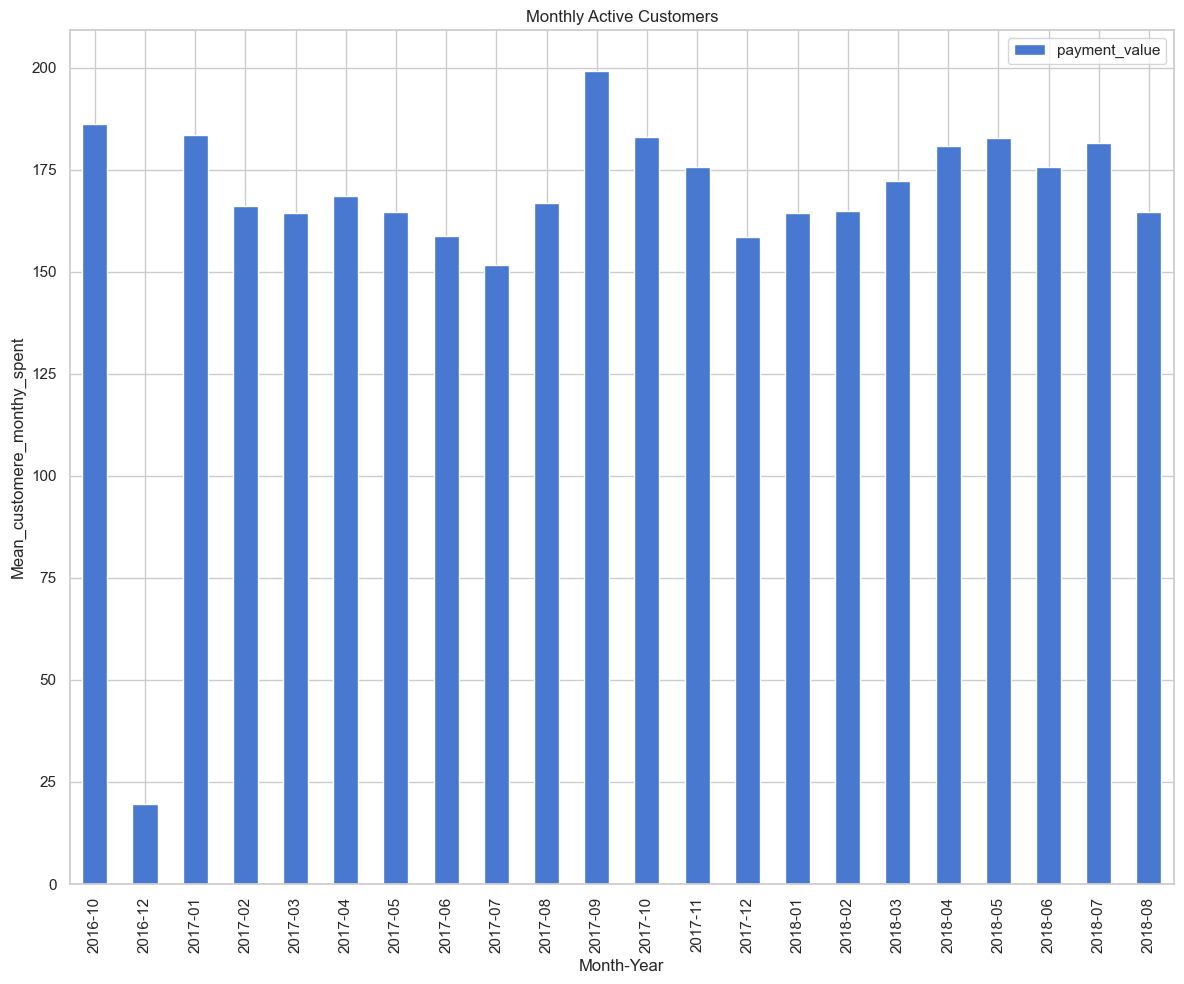

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(palette='muted', color_codes=True, style='whitegrid')
average_monthly_revPerCustomere.plot.bar(
    x="month_year",
    y="payment_value",
    ax=ax
)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Monthly Active Customers")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Mean_customere_monthy_spent")

plt.tight_layout()
plt.show()

__Inference__

- The average revenue has remained more or less flat over time. 

In [49]:
df_min_purchase=df.groupby("customer_unique_id")["order_purchase_timestamp"].min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate']=df_min_purchase['minpurchasedate'].map(lambda date:100*date.year+date.month)
df=df_min_purchase.merge(df,on='customer_unique_id')

In [50]:
df_min_purchase

,customer_unique_id,minpurchasedate
0,0000366f3b9a7992bf8c76cfdf3221e2,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805
2,0000f46a3911fa3c0805444483337064,201703
3,0000f6ccb0745a6a4b88665a16c9f078,201710
4,0004aac84e0df4da2b147fca70cf8255,201711
...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,201706
93337,fffea47cd6d3cc0a88bd621562a9d061,201712
93338,ffff371b4d645b6ecea244b27531430a,201702
93339,ffff5962728ec6157033ef9805bacc48,201805


In [51]:
df.head()

,customer_unique_id,minpurchasedate,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,...,'shipping_limit_date',delivery_against_estimated,order_purchase_year,order_purchase_month,dayofweek,day,order_purchase_hour,order_purchase_mon,month_year,month_y
0,0000366f3b9a7992bf8c76cfdf3221e2,201805,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,1,credit_card,8,...,2018-05-15 11:11:18,4.0,2018,5,3,Thurs,10,May,2018-05,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,1,credit_card,1,...,2018-05-11 17:56:33,4.0,2018,5,0,Mon,11,May,2018-05,201805
2,0000f46a3911fa3c0805444483337064,201703,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,1,credit_card,8,...,2017-03-15 21:05:03,1.0,2017,3,4,Fri,21,Mar,2017-03,201703
3,0000f6ccb0745a6a4b88665a16c9f078,201710,914991f0c02ef0843c0e7010c819d642,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,1,credit_card,4,...,2017-10-18 21:49:17,11.0,2017,10,3,Thurs,20,Oct,2017-10,201710
4,0004aac84e0df4da2b147fca70cf8255,201711,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,1,credit_card,6,...,2017-11-22 20:06:52,7.0,2017,11,1,Tue,19,Nov,2017-11,201711


In [52]:
df["existing_user_Or_not"]="Existing"
df["existing_user_Or_not"]=np.where((df["month_y"]>df['minpurchasedate']),"Existing","New")

__Revenue from new vs repeat (existing) customers___

In [53]:
df_user_type_revanue=df.groupby(["month_y","existing_user_Or_not","month_year"])["payment_value"].sum().reset_index()

df_user_type_revanue

,month_y,existing_user_Or_not,month_year,payment_value
0,201610,New,2016-10,62591.65
1,201612,New,2016-12,19.62
2,201701,Existing,2017-01,19.62
3,201701,New,2017-01,176356.94
4,201702,Existing,2017-02,111.07
...,...,...,...,...
37,201806,New,2018-06,1244455.89
38,201807,Existing,2018-07,33086.53
39,201807,New,2018-07,1273620.89
40,201808,Existing,2018-08,27898.55


Text(0, 0.5, 'payment_value')

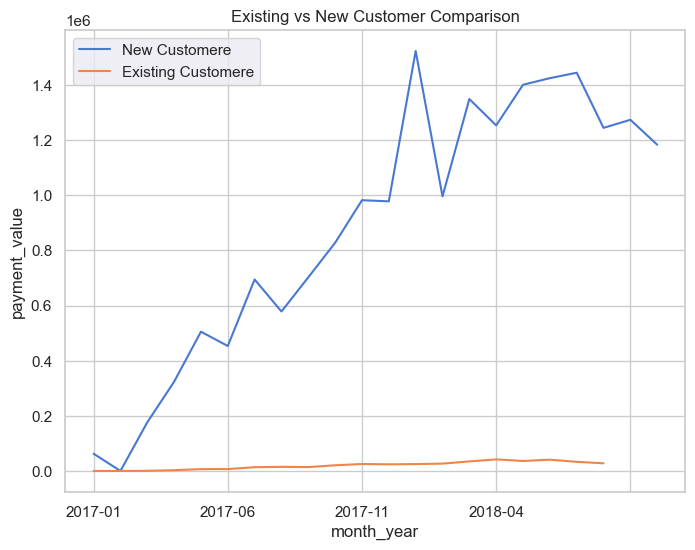

In [54]:
fig,ax=plt.subplots(figsize=(8,6))
sns.set(palette='muted', color_codes=True)
df_user_type_revanue.query("existing_user_Or_not == 'New'").plot("month_year","payment_value",ax=ax,label="New Customere")
df_user_type_revanue.query("existing_user_Or_not == 'Existing'").plot("month_year","payment_value",ax=ax,label="Existing Customere")
ax.set_title('Existing vs New Customer Comparison')
ax.set_xlabel("month_year")
ax.set_ylabel("payment_value")

____Inference____

most of the orders(sells) are coming from new customeres

___Monthy Retention Rate___

In [55]:
df.columns

Index(['customer_unique_id', 'minpurchasedate', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'order_date', ''shipping_limit_date'', 'delivery_against_estimated',
       'order_purchase_year', 'order_purchase_month', 'dayofweek', 'day',
       'order_purchase_hour', 'order_purchase_mon', 'month_year', 'month_y',
       'existing_user_Or_not'],
      dtype='object')

In [56]:
df_user_purchase_monthly=df.groupby(['customer_unique_id','month_y'])['payment_value'].sum().reset_index()
df_user_purchase_monthly

,customer_unique_id,month_y,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,201805,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805,27.19
2,0000f46a3911fa3c0805444483337064,201703,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,201710,43.62
4,0004aac84e0df4da2b147fca70cf8255,201711,196.89
...,...,...,...
95171,fffcf5a5ff07b0908bd4e2dbc735a684,201706,4134.84
95172,fffea47cd6d3cc0a88bd621562a9d061,201712,84.58
95173,ffff371b4d645b6ecea244b27531430a,201702,112.46
95174,ffff5962728ec6157033ef9805bacc48,201805,133.69


In [57]:
monthly_customere_data=pd.crosstab(df_user_purchase_monthly["customer_unique_id"],df_user_purchase_monthly["month_y"])
monthly_customere_data

month_y,201610,201612,201701,201702,201703,201704,201705,201706,201707,201708,...,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# creating a usercolumn which gives month_y, TotalUserCount,RetainedUserCount,RetaintionRate
month_y_unique=df["month_y"].unique()
month_year_unique=df["month_year"].unique()
TotalUserCount=[]
df_TotalUserCount=pd.DataFrame()
for col in monthly_customere_data.columns:
   Monthly_TotalUserCount=monthly_customere_data[col].sum()
   TotalUserCount.append(Monthly_TotalUserCount)
df_TotalUserCount["month_y_unique"]=pd.DataFrame(month_y_unique)
df_TotalUserCount["month_year_unique"]=pd.DataFrame(month_year_unique)
df_TotalUserCount["TotalUserCount"]=pd.DataFrame(TotalUserCount)

In [59]:
df_TotalUserCount

,month_y_unique,month_year_unique,TotalUserCount
0,201805,2018-05,267
1,201703,2017-03,1
2,201710,2017-10,716
3,201711,2017-11,1618
4,201804,2018-04,2508
5,201802,2018-02,2274
6,201803,2018-03,3478
7,201707,2017-07,3076
8,201708,2017-08,3802
9,201709,2017-09,4114


<Axes: xlabel='month_year_unique'>

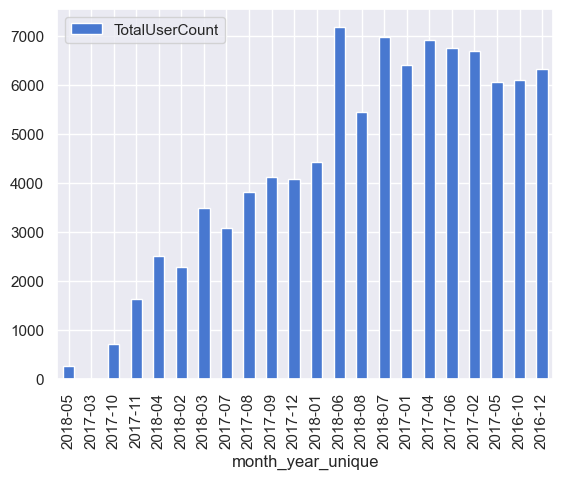

In [60]:
df_TotalUserCount.plot.bar("month_year_unique","TotalUserCount")


<h3 style="background-color: lightblue; padding: 10px;">
    Data sorting for model building
</h3>

if we carefully look at the order_status column it contain order current status, we are mainly interested in order that havebeen delivered

In [61]:
df["order_status"].value_counts()

order_status
delivered    115011
canceled          7
Name: count, dtype: int64

In [62]:
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [63]:
orders=orders[orders["order_status"]=="delivered"]
orders.shape

(96478, 8)

In [64]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [65]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [66]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
orders=orders[['customer_id', 'order_id', 'order_purchase_timestamp']]
customers = customers[['customer_id', 'customer_unique_id']]
payments = payments[['order_id', 'payment_value']]

In [68]:
data = pd.merge(orders,customers,on='customer_id')
data=pd.merge(data,payments,on='order_id')
data

,customer_id,order_id,order_purchase_timestamp,customer_unique_id,payment_value
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,141.46
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,179.12
...,...,...,...,...,...
100751,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,85.08
100752,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,195.00
100753,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,271.01
100754,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,441.16


__Dropping Customere_id and order_id__


In our final merged dataset, we keep only the identifiers that truly matter for customer-level analysis. Since order_id refers to individual orders and customer_id changes from session to session—even for the same person—we remove both of these columns to avoid confusion and redundancy. Instead, we retain __customer_unique_id__, which consistently represents the actual customer across all of their purchases. This is the only identifier we need for accurate Customer Lifetime Value (CLTV) calculations.

If the same person buys again later, they get a new customer_id
so that is the reason dropping it.

In [69]:
data=data.drop(columns=["customer_id","order_id"])

In [70]:
data.head()

,order_purchase_timestamp,customer_unique_id,payment_value
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59
3,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,141.46
4,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,179.12


In [71]:
data.isnull().any()

order_purchase_timestamp    False
customer_unique_id          False
payment_value               False
dtype: bool

In [72]:
data.shape

(100756, 3)

In [73]:
data.drop_duplicates(inplace=True)

In [74]:
data.shape

(100137, 3)

In [75]:
data.customer_unique_id.nunique()

93357

__RFM__ (Recency, Frequency, Monetary) metrics help us understand the health and value of each customer by examining their purchasing behavior. Whenever a customer contacts a business—for sales inquiries, support issues, or when the business initiates marketing communication—it is crucial to know the customer’s current engagement level. In other words, we want to understand how recently they made a purchase, how often they have bought from us, and how much revenue they typically generate. For example, a customer who has purchased ten times in the last month is clearly far more valuable than someone who bought once three years ago and never returned. Because these two customers have very different behavioral patterns, the messaging and marketing strategy directed toward them should also differ.

To capture these patterns, customers are evaluated based on three metrics: Recency (how long ago the last purchase was made), Frequency (how many purchases the customer has made), and Monetary value (the total amount they have spent). These definitions apply to customer segmentation; predictive CLTV modeling uses a slightly different interpretation of these terms, which we will address later.

For practical CRM and marketing use, it is helpful to convert numerical RFM values into intuitive customer groups such as Low Value, Medium Value, and High Value.

Low-value customers tend to purchase infrequently, spent small amounts, and made their last purchase long ago.

High-value customers are highly engaged—they buy often, spend significantly, and have purchased recently.

Medium-value customers fall between these two extremes across all three metrics.

Rather than setting arbitrary thresholds, a better approach is to allow the data itself to reveal natural groupings or clusters within customer behavior. With this principle in mind, we can now proceed to implement RFM segmentation using code.

<h3 style="background-color: lightblue; padding: 10px;">
    Recency
</h3>

In [76]:
data.head()

,order_purchase_timestamp,customer_unique_id,payment_value
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59
3,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,141.46
4,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,179.12


In [77]:
date_today=data["order_purchase_timestamp"].max()
date_today

'2018-08-29 15:00:37'

In [78]:
data_r=data.groupby("customer_unique_id")["order_purchase_timestamp"].agg(["min","max"])
data_r.head()

,min,max
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42


In [79]:
Recency=pd.to_datetime(date_today)-pd.to_datetime(data_r["max"])

In [80]:
recency_data=pd.merge(data_r,Recency,left_index=True,right_index=True)
recency_data["Recency"]=recency_data["max_y"].dt.days

In [81]:
recency_data.head()

,min,max_x,max_y,Recency
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,111 days 04:04:10,111
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,114 days 03:49:10,114
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,536 days 17:55:34,536
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,320 days 18:30:56,320
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,287 days 19:14:55,287


<h3 style="background-color: lightblue; padding: 10px;">
    __Frequency and Monetary__
</h3>

In [82]:
data["customer_unique_id"].value_counts()

customer_unique_id
f9ae226291893fda10af7965268fb7f6    23
569aa12b73b5f7edeaa6f2a01603e381    22
2524dcec233c3766f2c2b22f69fd65f4    19
6fbc7cdadbb522125f4b27ae9dee4060    17
24f12460aad399ba18f4ed2c2fbab65d    17
                                    ..
02029b32d4185a32a888c3f2d4d8839f     1
15b1c5678192a25402638f9bb93e9c02     1
bd7df6ff9e4a04991eea842883f79e9a     1
4a7ce65ce092885c0af12dc0001457cf     1
80bb27c7c16e8f973207a5086ab329e2     1
Name: count, Length: 93357, dtype: int64

In [83]:
aggregations = {
    'order_purchase_timestamp':'count',
    'payment_value': 'sum'}

frequency_data = df.groupby('customer_unique_id').agg(aggregations)
frequency_data.rename(columns={"order_purchase_timestamp":"Frequency",
                    "payment_value":"Monetary"}, inplace=True)
frequency_data.head()

,Frequency,Monetary
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
0000f46a3911fa3c0805444483337064,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,196.89


__Merge Data__

In [84]:
data_rfm=pd.merge(recency_data,frequency_data,left_index=True,right_index=True).reset_index()
data_rfm

,customer_unique_id,min,max_x,max_y,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,111 days 04:04:10,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,114 days 03:49:10,114,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,536 days 17:55:34,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,320 days 18:30:56,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,287 days 19:14:55,287,1,196.89
...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,446 days 18:00:01,446,2,4134.84
93331,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,261 days 18:52:41,261,1,84.58
93332,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,567 days 23:11:21,567,1,112.46
93333,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,118 days 23:42:56,118,1,133.69


In [85]:
data_rfm.drop(columns=["min","max_x","max_y"],inplace=True)

In [86]:
data_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [87]:
data_rfm["Monetary"].max()

np.float64(109312.64)

__Plot histogram__

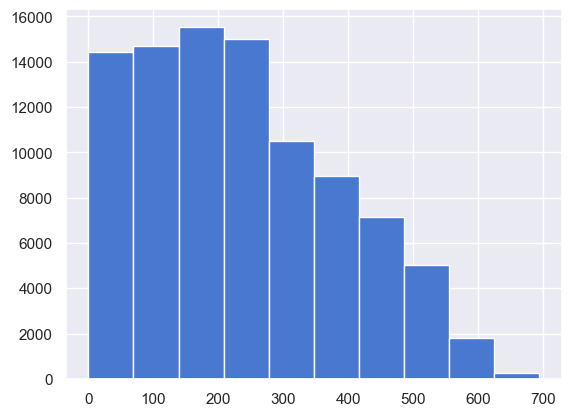

In [88]:
plt.hist(np.int64(data_rfm["Recency"]))
plt.show()

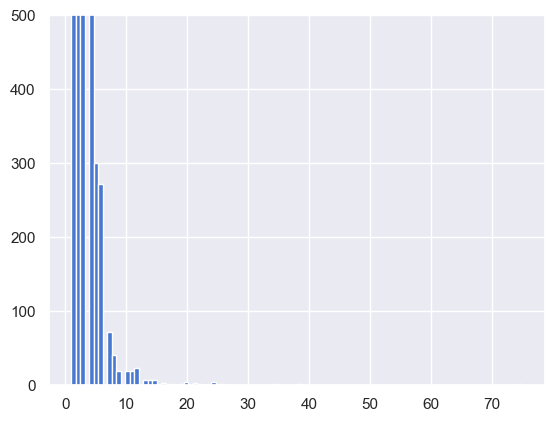

In [89]:
plt.hist((data_rfm["Frequency"]),bins=100)
plt.ylim(0,500)
plt.show()

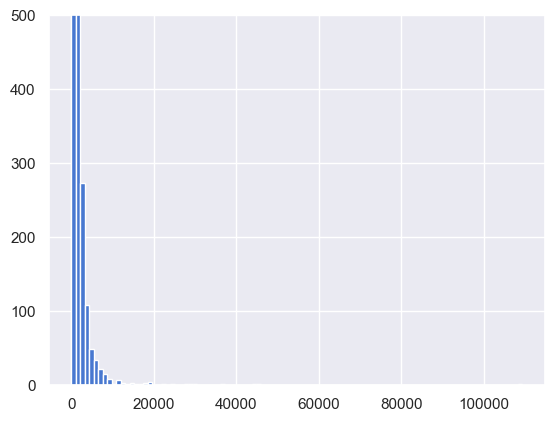

In [90]:
plt.hist(np.int64(data_rfm["Monetary"]),bins=100)
plt.ylim(0,500)
plt.show()

In [91]:
data_rfm.describe()

,Recency,Frequency,Monetary
count,93335.000000,93335.000000,93335.000000
mean,236.898752,1.232239,211.844495
std,152.545822,0.819845,642.239857
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.750000
50%,218.000000,1.000000,112.950000
75%,345.000000,1.000000,201.740000
max,694.000000,75.000000,109312.640000


On average, customers made their last purchase about 8 months ago.

50% of customers have not purchased in over 7 months.

Some customers are highly active (0 days) — meaning they purchased on the last date of your dataset.

Some have not purchased for almost 2 years (695 days).

Most customers bought only once (median = 1).

Only a small minority are repeat buyers.

A few loyal customers have purchased many times (up to 75 orders).

Most customers spend small amounts .

A few customers spend very large amounts (up to ₹1 lakh).

The high standard deviation means monetary values are very spread out.

This is typical in e-commerce where:

some customers buy cheap items

some buy expensive electronics, furniture, etc.

<h3 style="background-color: lightblue; padding: 10px;">
    __Clustering___
</h3>

__According to Recency__


In [92]:
x=data_rfm[["Recency"]]

In [93]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# sil_scores1 = []   # list to store silhouette scores

# for n_cluster in range(2, 10):
#     kmean = KMeans(n_clusters=n_cluster, random_state=42).fit(x)
#     labels = kmean.labels_
#     score_value = silhouette_score(x, labels)
#     sil_scores1.append(score_value)
# print(sil_scores1)


In [94]:
# plt.plot(range(2,10),sil_scores1)

according too silhouete score n_cluster will be 2

__Lets check inertia value__

In [95]:
inertia1 =[]
for n_cluster in range(1, 10):
    kmean = KMeans(n_clusters=n_cluster,max_iter=1000).fit(x)
    labels = kmean.labels_
    inertia_val=kmean.inertia_
    inertia1.append(inertia_val)

In [96]:
inertia1

[2171903433.2045827,
 643585026.4984827,
 285597325.70828277,
 168878370.88661855,
 106726810.79306614,
 79859901.70886053,
 55258251.868177615,
 43656848.91528669,
 36758081.34447385]

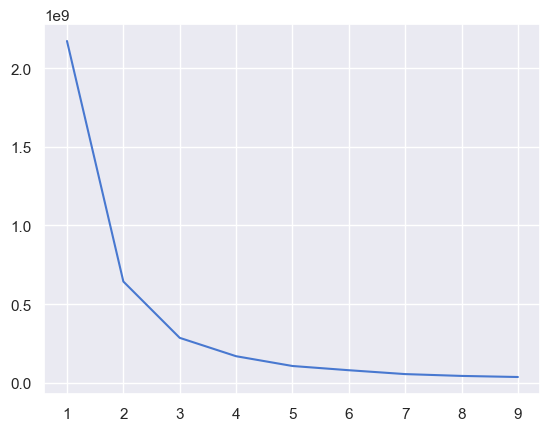

In [97]:
plt.plot(range(1,10),inertia1)

According to elbow method n_cluster is 3 is better

In [98]:
 kmean = KMeans(n_clusters=3,max_iter=1000).fit(x)
 labels = kmean.labels_
 labels
 

array([1, 1, 2, ..., 2, 1, 2], shape=(93335,), dtype=int32)

In [99]:
data_rfm["Recency_cluster"]=labels

In [100]:
data_rfm

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1
2,0000f46a3911fa3c0805444483337064,536,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0
...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,2
93331,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0
93332,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2
93333,ffff5962728ec6157033ef9805bacc48,118,1,133.69,1


In [101]:
data_rfm["Recency_cluster"].value_counts()

Recency_cluster
1    36297
0    35375
2    21663
Name: count, dtype: int64

In [102]:
data_rfm_cluster=data_rfm.groupby("Recency_cluster")["Recency"].agg(['mean','count'])
data_rfm_cluster.reset_index

<bound method DataFrame.reset_index of                        mean  count
Recency_cluster                   
0                255.424565  35375
1                 86.946745  36297
2                457.895721  21663>

In [103]:
data_rfm["Recency_cluster"] = (
    data_rfm["Recency_cluster"]
    .replace({0: 1, 1: 0, 2: 2})
)
data_rfm_cluster=data_rfm.groupby("Recency_cluster")["Recency"].agg(['mean','count'])
data_rfm_cluster.reset_index

<bound method DataFrame.reset_index of                        mean  count
Recency_cluster                   
0                 86.946745  36297
1                255.424565  35375
2                457.895721  21663>

Reordering Recency cluster

<Axes: xlabel='Recency', ylabel='Monetary'>

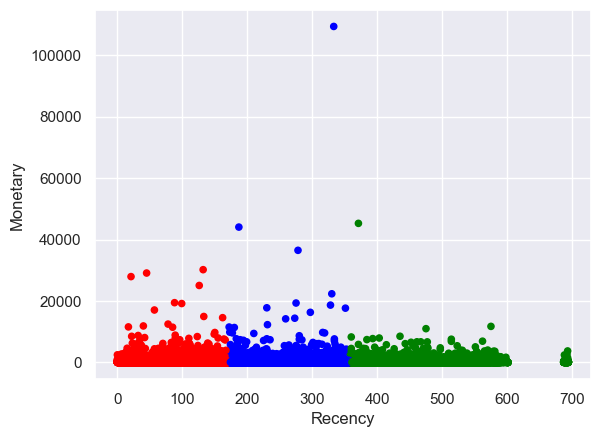

In [104]:
data_rfm["Recency"]=data_rfm["Recency"]
data_rfm.plot(
    kind='scatter',
    x="Recency",
    y="Monetary",
    color=data_rfm.Recency_cluster.map({0: 'red', 1: 'blue', 2: 'green'})
)


__Lets check Frequency cluster__

In [105]:
x1=data_rfm[["Frequency"]]

In [106]:
inertia2 ={}
for n_cluster in range(1, 10):
    kmean = KMeans(n_clusters=n_cluster,max_iter=1000).fit(x1)
    labels = kmean.labels_
    inertia_val=kmean.inertia_
    inertia2[n_cluster]=inertia_val

In [107]:
list(inertia2.values())

[62733.99372155312,
 36378.16780539162,
 17827.500063400752,
 10704.111716448071,
 8310.89169279001,
 4044.4089723679513,
 2629.290094628822,
 1662.6568476775976,
 895.3457814332314]

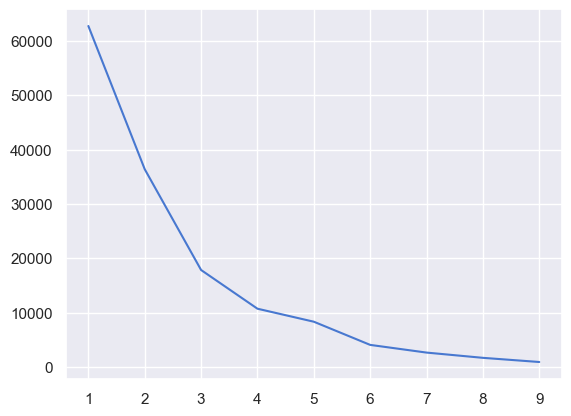

In [108]:
plt.plot(list(inertia2.keys()),list(inertia2.values()))

In [109]:
 kmean = KMeans(n_clusters=3,max_iter=1000).fit(x1)
 labels = kmean.labels_
 labels
 

array([0, 0, 0, ..., 0, 0, 0], shape=(93335,), dtype=int32)

In [110]:
data_rfm["Frequency_cluster"]=labels

In [111]:
data_rfm

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,2,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0
...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,2,0
93331,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0
93332,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2,0
93333,ffff5962728ec6157033ef9805bacc48,118,1,133.69,0,0


In [112]:
data_rfm_cluster=data_rfm.groupby("Frequency_cluster")["Frequency"].agg(['mean','count'])
data_rfm_cluster.reset_index

<bound method DataFrame.reset_index of                         mean  count
Frequency_cluster                  
0                   1.116048  89730
1                   3.829672   3505
2                  14.450000    100>

In [113]:
data_rfm_cluster=data_rfm["Frequency_cluster"].map({1:2,2:1})
data_rfm_cluster=data_rfm.groupby("Frequency_cluster")["Frequency"].agg(['mean','count'])
data_rfm_cluster

,mean,count
Frequency_cluster,,
0,1.116048,89730
1,3.829672,3505
2,14.450000,100


<Axes: xlabel='Frequency', ylabel='Monetary'>

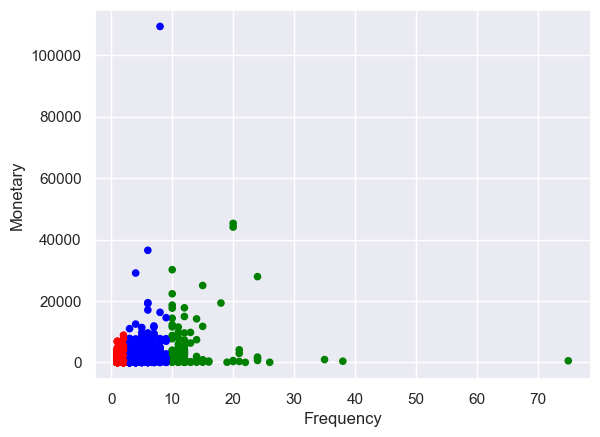

In [114]:
data_rfm["Frequency"]=data_rfm["Frequency"]
data_rfm.plot(
    kind='scatter',
    x="Frequency",
    y="Monetary",
    c=data_rfm.Frequency_cluster.map({0: 'red', 1: 'blue', 2: 'green'})
)

__Lets check Monetary__

In [115]:
x2=data_rfm[["Monetary"]]

In [116]:
inertia3 ={}
for n_cluster in range(1, 10):
    kmean = KMeans(n_clusters=n_cluster, max_iter=1000).fit(x2)
    labels = kmean.labels_
    inertia_val=kmean.inertia_
    inertia3[n_cluster]=inertia_val

In [117]:
inertia3

{1: 38497664856.419395,
 2: 23082585775.43344,
 3: 14850428984.149773,
 4: 8484454674.152433,
 5: 7010908957.624542,
 6: 3717219834.9055424,
 7: 2494868935.617132,
 8: 1976856697.5015106,
 9: 1580123662.0195813}

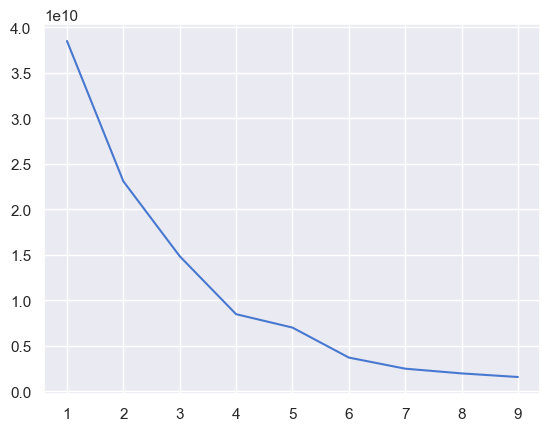

In [118]:
plt.plot(list(inertia3.keys()),list(inertia3.values()))

In [119]:
 kmean = KMeans(n_clusters=4, random_state=42).fit(x2)
 labels = kmean.labels_
 labels

array([0, 0, 0, ..., 0, 0, 0], shape=(93335,), dtype=int32)

In [120]:
data_rfm["Monetory_cluster"]=labels

In [121]:
data_rfm

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetory_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,2,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0,0
...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,2,0,3
93331,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0,0
93332,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2,0,0
93333,ffff5962728ec6157033ef9805bacc48,118,1,133.69,0,0,0


In [122]:
data_rfm_cluster=data_rfm.groupby("Monetory_cluster")["Monetary"].agg(['mean','count'])
data_rfm_cluster.reset_index

<bound method DataFrame.reset_index of                            mean  count
Monetory_cluster                      
0                    173.273456  92111
1                  23201.656000     20
2                 109312.640000      1
3                   2692.243400   1203>

In [123]:
data_rfm["Monetory_cluster"] = data_rfm["Monetory_cluster"].replace({
    0: 0,   
    3: 1,
    1: 2,
    2: 3    
})


In [124]:
data_rfm_cluster=data_rfm.groupby("Monetory_cluster")["Monetary"].agg(['mean','count'])
data_rfm_cluster

,mean,count
Monetory_cluster,,
0,173.273456,92111
1,2692.243400,1203
2,23201.656000,20
3,109312.640000,1


<Axes: xlabel='Frequency', ylabel='Monetary'>

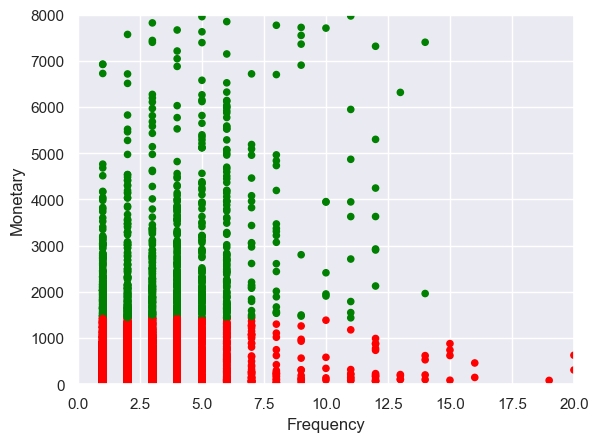

In [125]:
data_rfm.plot(x='Frequency', y='Monetary', kind='scatter', color=data_rfm.Monetory_cluster.map({0:'red', 1:'green', 2:'blue', 3:'orange'}),
             ylim=[0,8000], 
            xlim=[0,20])

In [126]:
data_rfm=data_rfm.drop(columns="customer_unique_id")

In [127]:
data_rfm

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetory_cluster
0,111,1,141.90,0,0,0
1,114,1,27.19,0,0,0
2,536,1,86.22,2,0,0
3,320,1,43.62,1,0,0
4,287,1,196.89,1,0,0
...,...,...,...,...,...,...
93330,446,2,4134.84,2,0,1
93331,261,1,84.58,1,0,0
93332,567,1,112.46,2,0,0
93333,118,1,133.69,0,0,0


<h3 style="background-color: lightblue; padding: 10px;">
    Overall Segmentation 
</h3>


In [128]:
data_rfm["Segmentation"]=data_rfm.apply(lambda x: x["Recency_cluster"]+x["Frequency_cluster"]+x["Monetory_cluster"],axis=1)

In [129]:
data_rfm

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetory_cluster,Segmentation
0,111,1,141.90,0,0,0,0.0
1,114,1,27.19,0,0,0,0.0
2,536,1,86.22,2,0,0,2.0
3,320,1,43.62,1,0,0,1.0
4,287,1,196.89,1,0,0,1.0
...,...,...,...,...,...,...,...
93330,446,2,4134.84,2,0,1,3.0
93331,261,1,84.58,1,0,0,1.0
93332,567,1,112.46,2,0,0,2.0
93333,118,1,133.69,0,0,0,0.0


In [130]:
data_rfm.groupby("Segmentation").agg({"Recency":["count",np.mean],"Frequency":[np.mean],"Monetary":np.mean})

C:\Users\prasa\AppData\Local\Temp\ipykernel_17764\2914854035.py:1: FutureWarning: The provided callable <function mean at 0x0000015856EE6B60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_rfm.groupby("Segmentation").agg({"Recency":["count",np.mean],"Frequency":[np.mean],"Monetary":np.mean})


Recency              Frequency      Monetary
               count        mean       mean          mean
Segmentation                                             
0.0            34635   86.854482   1.112343    163.766932
1.0            35172  248.771238   1.198254    185.813993
2.0            22318  441.915449   1.294157    228.639167
3.0             1009  400.493558   3.949455   1446.856472
4.0              189  435.296296   6.899471   3510.319524
5.0               11  322.636364  13.454545  26694.088182
6.0                1  371.000000  20.000000  45256.000000

__Observation__

The observed pattern indicates that Recency and Monetary do not follow a strictly monotonic trend, unlike Frequency, which increases consistently. This suggests that a customer’s Monetary value is not perfectly correlated with their purchase frequency.

For easier interpretation, these clusters can be grouped into human-readable segments:

Clusters 0 and 1 → __Low__: Customers who purchased a long time ago, with low purchase frequency and low spending.

Clusters 2 and 3 → __Mid__: Customers with moderate purchase behavior.

Clusters 4 and 5 → __High__: Customers who purchased recently, with frequent purchases and high spending.

Clusters 6 and 7 → __Very High__: Customers with extremely high purchase frequency and monetary value, though Recency may not always be low.

It is important to note that labeling a customer as “Low” does not necessarily indicate low business value. For example, a customer who made purchases a long time ago but did so frequently could still represent a valuable segment worth re-engaging.

In such cases, rather than aggregating RFM cluster scores by summing them, it may be more meaningful to consider the minimum of the RFM cluster values. This approach can better capture a customer’s true potential and highlight opportunities for targeted engagement.

In [137]:
data_rfm["segment_category"]=data_rfm["Segmentation"].map({0:"Low",1:"Low",2:"Mid",3:"Mid",4:"High",5:"High",6:"Very High",7:"Very High"})

In [138]:
data_rfm

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetory_cluster,Segmentation,segment_category
0,111,1,141.90,0,0,0,0.0,Low
1,114,1,27.19,0,0,0,0.0,Low
2,536,1,86.22,2,0,0,2.0,Mid
3,320,1,43.62,1,0,0,1.0,Low
4,287,1,196.89,1,0,0,1.0,Low
...,...,...,...,...,...,...,...,...
93330,446,2,4134.84,2,0,1,3.0,Mid
93331,261,1,84.58,1,0,0,1.0,Low
93332,567,1,112.46,2,0,0,2.0,Mid
93333,118,1,133.69,0,0,0,0.0,Low


In [139]:
data_segment=data_rfm.groupby('segment_category').agg({'Recency':[len, np.mean],'Frequency':np.mean,'Monetary':np.mean}).sort_values(("Monetary","mean"),ascending=False)

C:\Users\prasa\AppData\Local\Temp\ipykernel_17764\1015847010.py:1: FutureWarning: The provided callable <function mean at 0x0000015856EE6B60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_segment=data_rfm.groupby('segment_category').agg({'Recency':[len, np.mean],'Frequency':np.mean,'Monetary':np.mean}).sort_values(("Monetary","mean"),ascending=False)


In [140]:
data_segment

Recency              Frequency      Monetary
                     len        mean       mean          mean
segment_category                                             
Very High              1  371.000000  20.000000  45256.000000
High                 200  429.100000   7.260000   4785.426800
Mid                23327  440.123762   1.409011    281.332666
Low                69807  168.435644   1.155629    174.875262

The segments are ordered by decreasing average monetary value, clearly highlighting customer value differences. The __Very High__ segment, although the smallest in size, exhibits the highest purchase frequency and monetary contribution, making it the most valuable group. The __High__ segment also represents strong customer value, with high frequency and substantial spending, though with a slightly larger customer base. The __Mid__ segment contains a moderate number of customers with low-to-moderate frequency and spending, indicating potential for growth through targeted engagement. The __Low__ segment comprises the majority of customers but contributes the least in terms of frequency and monetary value, suggesting largely inactive or low-value customers who may benefit from reactivation or low-cost marketing strategies.

__Frequency vs Monetary approach F vs M__

In [141]:
data_rfm.head()

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetory_cluster,Segmentation,segment_category
0,111,1,141.90,0,0,0,0.0,Low
1,114,1,27.19,0,0,0,0.0,Low
2,536,1,86.22,2,0,0,2.0,Mid
3,320,1,43.62,1,0,0,1.0,Low
4,287,1,196.89,1,0,0,1.0,Low


<Axes: xlabel='Frequency', ylabel='Monetary'>

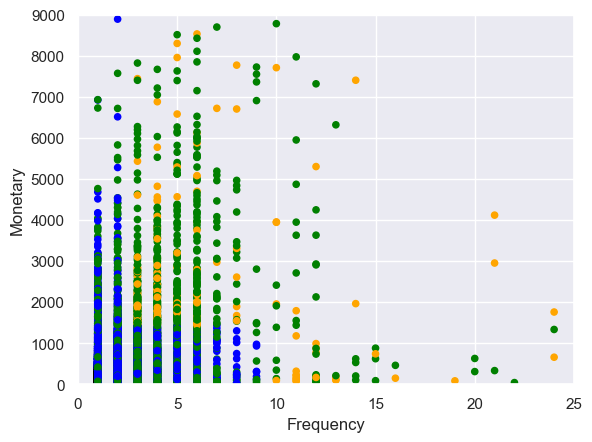

In [136]:
data_rfm.plot(x="Frequency",
              y="Monetary",
              kind="scatter",
              color=data_rfm["segment_category"].map({"Low":'blue',"Mid":'green',"High":'orange','Very High':'red'}),
              ylim=[0,9000], 
              xlim=[0,25])

__Recency vs Monetory approach__

<Axes: xlabel='Recency', ylabel='Monetary'>

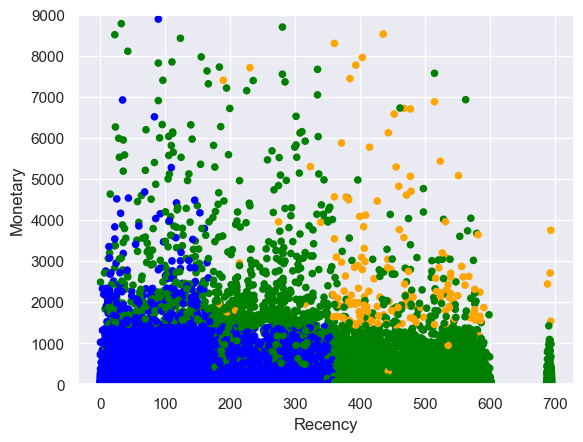

In [143]:
data_rfm.plot(x="Recency",
              y="Monetary",
              kind="scatter",
              color=data_rfm["segment_category"].map({"Low":'blue',"Mid":'green',"High":'orange','Very High':'red'}),
              ylim=[0,9000], 
              )

__Note:__ high segment(orange) have relatively high Recency but medium to high monetory.low(blue) having low monetory and recency which make sense.mid(green) having high recency and moderately high monetory(which is also ok)

__Frequency vs Recency__

<Axes: xlabel='Recency', ylabel='Frequency'>

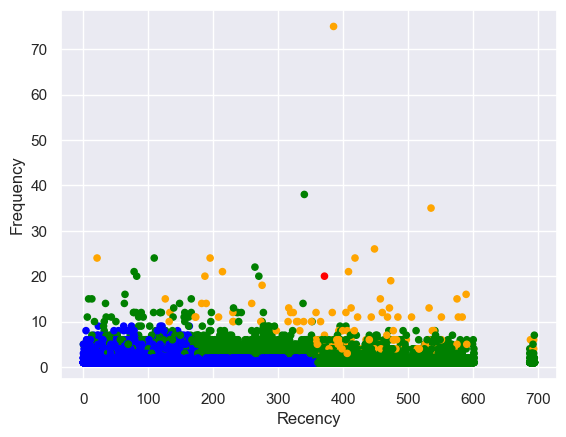

In [151]:
data_rfm.plot(x='Recency', y='Frequency', kind='scatter', color=data_rfm.segment_category.map({"Low":'blue',"Mid":'green',"High":'orange','Very High':'red'}))

__Observation__

Low and medium are more concentrated. The high value (green) are spread out, indicating the high value customers can be across the board.